# Network Analysis with NetworkX

In this series of lessons, we're going to learn about network analysis. Network analysis will help us better understand the complex relationships between groups of people, fictional characters, and other kinds of things.

## Install NetworkX

In [14]:
!pip install networkx

## Import Libraries

In [2]:
import networkx as nx
import pandas as pd
#pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt

## *Tennis Matches* Network

O dataset utilizado neste notebook poderá ser encontrado através do link:
https://www.kaggle.com/datasets/dissfya/atp-tennis-2000-2023daily-pull

Atualizado semanalmente, o dataset contém mais de 60 mil partidas ATP (Associação Profissional de Tênis) entre 2000 e 2024.

Cada partida inclui o torneio, a data, o tipo de torneio, se a partida foi disputada em local fechado ou não, o tipo da superficie da quadra, a rodada da partida, o número máximo de sets na partida, os participantes da partida, o vencedor, a classificação dos participantes, as probabilidades de vitória e o placar da partida.

In [3]:
tennis_df = pd.read_csv("https://raw.githubusercontent.com/Dieg0Dev/datasets/main/atp_tennis.csv")

### Modificar o tipo da coluna Date de String para o tipo Date para melhor análise.

In [3]:
tennis_df['Date'] = pd.to_datetime(tennis_df['Date'], errors='coerce')

### Fazer uma filtragem e criar 5 outros datasets onde 1 terá todos os grand slams e cada um dos outros quatro será um grand slam.

In [4]:
grand_slams = tennis_df[tennis_df['Series'] == 'Grand Slam']
australian_open = tennis_df[tennis_df['Tournament'] == 'Australian Open']
french_open = tennis_df[tennis_df['Tournament'] == 'French Open']
wimbledon = tennis_df[tennis_df['Tournament'] == 'Wimbledon']
us_open = tennis_df[tennis_df['Tournament'] == 'US Open']

### Filtragem apenas com as partidas do ano definido na variável 'year'. Nos exemplos a seguir será utilizado o dataset referente ao torneio de wimbledon

In [5]:
torneio = wimbledon
year = 2023

In [6]:
torneio = torneio[torneio['Date'].dt.year == year]
torneio

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
60440,Wimbledon,2023-07-03,Grand Slam,Outdoor,Grass,1st Round,5,Barrios M.,Baez S.,Barrios M.,133,46,456,955,2.10,1.73,7-6 3-6 6-3 7-6
60441,Wimbledon,2023-07-03,Grand Slam,Outdoor,Grass,1st Round,5,Varillas J.P.,Musetti L.,Musetti L.,63,16,806,2210,10.00,1.06,3-6 1-6 5-7
60442,Wimbledon,2023-07-03,Grand Slam,Outdoor,Grass,1st Round,5,Karatsev A.,Van Assche L.,Karatsev A.,50,75,888,758,1.73,2.10,6-7 6-4 6-2 6-4
60443,Wimbledon,2023-07-03,Grand Slam,Outdoor,Grass,1st Round,5,Nakashima B.,Thompson J.,Thompson J.,55,70,855,769,1.91,1.91,6-2 6-2 4-6 6-7 3-6
60444,Wimbledon,2023-07-03,Grand Slam,Outdoor,Grass,1st Round,5,Rublev A.,Purcell M.,Rublev A.,7,64,4255,796,1.06,10.00,6-3 7-5 6-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60561,Wimbledon,2023-07-12,Grand Slam,Outdoor,Grass,Quarterfinals,5,Eubanks C.,Medvedev D.,Medvedev D.,43,3,976,5890,5.00,1.17,4-6 6-1 6-4 6-7 1-6
60562,Wimbledon,2023-07-12,Grand Slam,Outdoor,Grass,Quarterfinals,5,Alcaraz C.,Rune H.,Alcaraz C.,1,6,7675,4510,1.22,4.33,7-6 6-4 6-4
60563,Wimbledon,2023-07-14,Grand Slam,Outdoor,Grass,Semifinals,5,Sinner J.,Djokovic N.,Djokovic N.,8,2,3345,7595,4.50,1.20,3-6 4-6 6-7
60564,Wimbledon,2023-07-14,Grand Slam,Outdoor,Grass,Semifinals,5,Alcaraz C.,Medvedev D.,Alcaraz C.,1,3,7675,5890,1.36,3.20,6-3 6-3 6-3


In [7]:
# G = networkx.from_pandas_edgelist(tennis_df, 'Player_1', 'Player_2', 'Winner')
G = nx.DiGraph()

for index, row in torneio.iterrows():
    player1 = row['Player_1']
    player2 = row['Player_2']
    winner = row['Winner']
    
    if player1 == winner: 
        G.add_edge(player1, player2)
    else:
        G.add_edge(player2, player1)

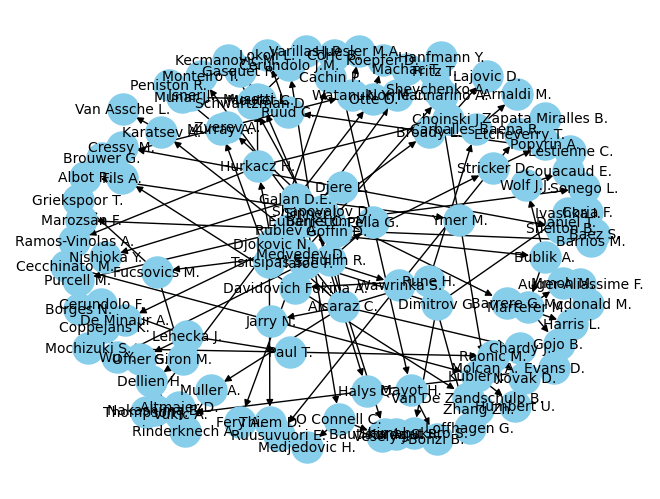

In [8]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black')
plt.show()

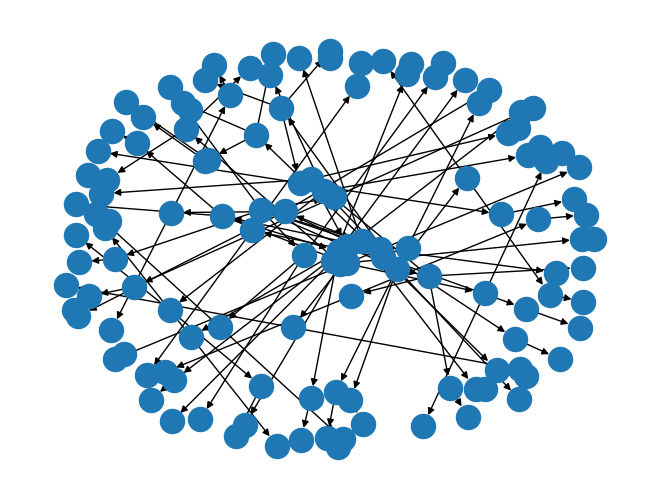

In [9]:
nx.draw(G)

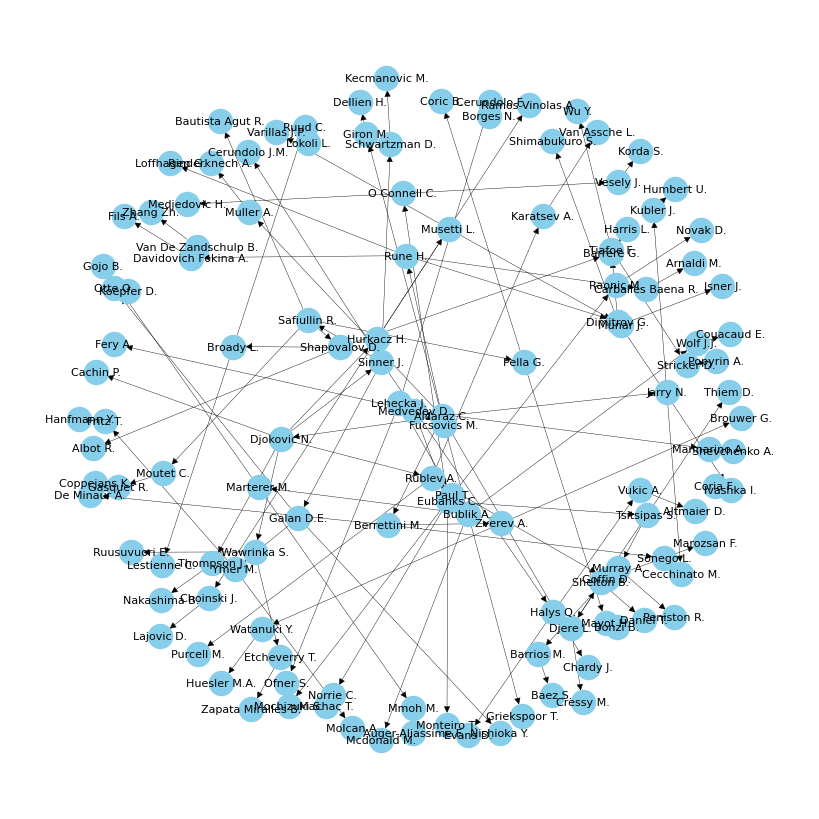

In [10]:
plt.figure(figsize=(8,8))
nx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

## Calculate Degree

Who has the most number of connections in the network?

In [50]:
nx.degree(G)

DiDegreeView({'Barrios M.': 2, 'Baez S.': 1, 'Musetti L.': 3, 'Varillas J.P.': 1, 'Karatsev A.': 2, 'Van Assche L.': 1, 'Thompson J.': 2, 'Nakashima B.': 1, 'Rublev A.': 5, 'Purcell M.': 1, 'Marterer M.': 3, 'Gojo B.': 1, 'Hurkacz H.': 4, 'Ramos-Vinolas A.': 1, 'Djokovic N.': 7, 'Cachin P.': 1, 'Mmoh M.': 2, 'Auger-Aliassime F.': 1, 'Moutet C.': 2, 'Gasquet R.': 1, 'Goffin D.': 3, 'Marozsan F.': 1, 'Broady L.': 3, 'Lestienne C.': 1, 'Wolf J.J.': 2, 'Couacaud E.': 1, 'Munar J.': 2, 'Isner J.': 1, 'Ruud C.': 2, 'Lokoli L.': 1, 'Choinski J.': 2, 'Lajovic D.': 1, 'Ymer M.': 3, 'Molcan A.': 1, 'Otte O.': 2, 'Koepfer D.': 1, 'Bublik A.': 4, 'Mcdonald M.': 1, 'Vukic A.': 2, 'Altmaier D.': 1, 'Schwartzman D.': 2, 'Kecmanovic M.': 1, 'Wawrinka S.': 3, 'Ruusuvuori E.': 1, 'Galan D.E.': 4, 'Nishioka Y.': 1, 'Sinner J.': 6, 'Cerundolo J.M.': 1, 'Alcaraz C.': 7, 'Chardy J.': 1, 'Murray A.': 2, 'Peniston R.': 1, 'Norrie C.': 2, 'Machac T.': 1, 'Halys Q.': 3, 'Evans D.': 1, 'Etcheverry T.': 2, 'Zapat

Make the degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [51]:
degrees = dict(nx.degree(G))
nx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='degree')`, then sort from highest to lowest

In [52]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
48,Alcaraz C.,7
14,Djokovic N.,7
46,Sinner J.,6
94,Eubanks C.,5
8,Rublev A.,5
...,...,...
29,Lokoli L.,1
87,Albot R.,1
89,Thiem D.,1
53,Machac T.,1


Plot the nodes with the highest degree values

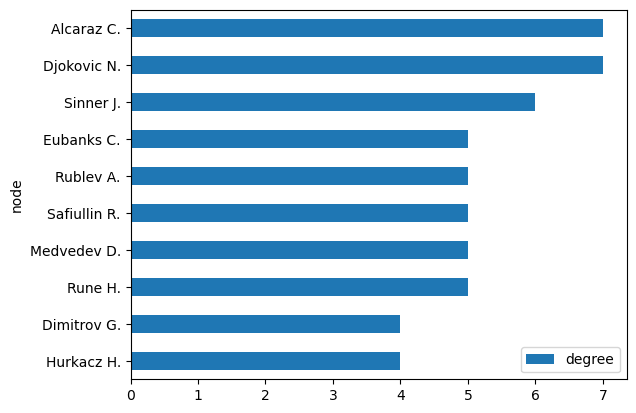

In [53]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

## Calculate Weighted Degree

Who has the most number of connections in the network (if you factor in edge weight)?

In [54]:
nx.degree(G, weight='Weight')

DiDegreeView({'Barrios M.': 2, 'Baez S.': 1, 'Musetti L.': 3, 'Varillas J.P.': 1, 'Karatsev A.': 2, 'Van Assche L.': 1, 'Thompson J.': 2, 'Nakashima B.': 1, 'Rublev A.': 5, 'Purcell M.': 1, 'Marterer M.': 3, 'Gojo B.': 1, 'Hurkacz H.': 4, 'Ramos-Vinolas A.': 1, 'Djokovic N.': 7, 'Cachin P.': 1, 'Mmoh M.': 2, 'Auger-Aliassime F.': 1, 'Moutet C.': 2, 'Gasquet R.': 1, 'Goffin D.': 3, 'Marozsan F.': 1, 'Broady L.': 3, 'Lestienne C.': 1, 'Wolf J.J.': 2, 'Couacaud E.': 1, 'Munar J.': 2, 'Isner J.': 1, 'Ruud C.': 2, 'Lokoli L.': 1, 'Choinski J.': 2, 'Lajovic D.': 1, 'Ymer M.': 3, 'Molcan A.': 1, 'Otte O.': 2, 'Koepfer D.': 1, 'Bublik A.': 4, 'Mcdonald M.': 1, 'Vukic A.': 2, 'Altmaier D.': 1, 'Schwartzman D.': 2, 'Kecmanovic M.': 1, 'Wawrinka S.': 3, 'Ruusuvuori E.': 1, 'Galan D.E.': 4, 'Nishioka Y.': 1, 'Sinner J.': 6, 'Cerundolo J.M.': 1, 'Alcaraz C.': 7, 'Chardy J.': 1, 'Murray A.': 2, 'Peniston R.': 1, 'Norrie C.': 2, 'Machac T.': 1, 'Halys Q.': 3, 'Evans D.': 1, 'Etcheverry T.': 2, 'Zapat

Make the weighted degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [74]:
weighted_degrees = dict(nx.degree(G, weight='Weight'))
nx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

Make a Pandas dataframe from the degree data G.nodes(data='weighted_degree'), then sort from highest to lowest

In [75]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
48,Alcaraz C.,7
14,Djokovic N.,7
46,Sinner J.,6
94,Eubanks C.,5
8,Rublev A.,5
...,...,...
29,Lokoli L.,1
87,Albot R.,1
89,Thiem D.,1
53,Machac T.,1


Plot the nodes with the highest weighted degree values

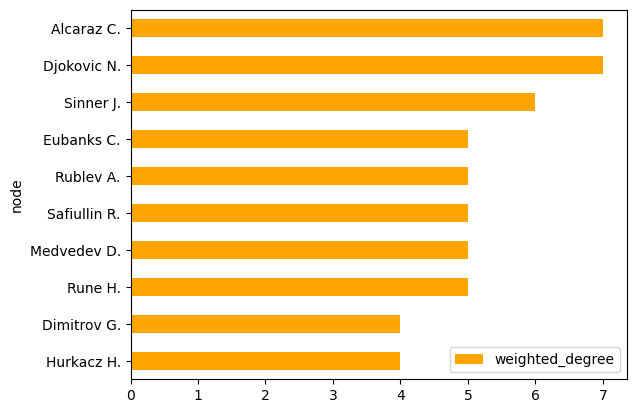

In [76]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

## Calculate Betweenness Centrality Scores

Who connects the most other nodes in the network?

In [77]:
nx.betweenness_centrality(G)

{'Barrios M.': 0.00024996875390576176,
 'Baez S.': 0.0,
 'Musetti L.': 0.000562429696287964,
 'Varillas J.P.': 0.0,
 'Karatsev A.': 0.00018747656542932132,
 'Van Assche L.': 0.0,
 'Thompson J.': 0.00012498437695288088,
 'Nakashima B.': 0.0,
 'Rublev A.': 0.0018747656542932132,
 'Purcell M.': 0.0,
 'Marterer M.': 0.0007499062617172853,
 'Gojo B.': 0.0,
 'Hurkacz H.': 0.0008748906386701661,
 'Ramos-Vinolas A.': 0.0,
 'Djokovic N.': 0.003937007874015748,
 'Cachin P.': 0.0,
 'Mmoh M.': 0.0003124609423822022,
 'Auger-Aliassime F.': 0.0,
 'Moutet C.': 0.00024996875390576176,
 'Gasquet R.': 0.0,
 'Goffin D.': 0.000562429696287964,
 'Marozsan F.': 0.0,
 'Broady L.': 0.0009373828271466066,
 'Lestienne C.': 0.0,
 'Wolf J.J.': 0.00024996875390576176,
 'Couacaud E.': 0.0,
 'Munar J.': 0.00024996875390576176,
 'Isner J.': 0.0,
 'Ruud C.': 0.00037495313085864263,
 'Lokoli L.': 0.0,
 'Choinski J.': 0.00018747656542932132,
 'Lajovic D.': 0.0,
 'Ymer M.': 0.0007499062617172853,
 'Molcan A.': 0.0,
 'Ott

In [78]:
betweenness_centrality = nx.betweenness_centrality(G)

Add `betweenness_centrality` (which is already a dictionary) as a network "attribute" with `networkx.set_node_attributes()`

In [79]:
nx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

Make a Pandas dataframe from the betweenness data `G.nodes(data='betweenness')`, then sort from highest to lowest

In [80]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
14,Djokovic N.,0.003937
46,Sinner J.,0.003875
78,Safiullin R.,0.002812
94,Eubanks C.,0.001875
8,Rublev A.,0.001875
...,...,...
53,Machac T.,0.000000
51,Peniston R.,0.000000
49,Chardy J.,0.000000
48,Alcaraz C.,0.000000


Plot the nodes with the highest betweenness centrality scores

Who forms distinct communities within this network?

In [81]:
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [82]:
communities = community.greedy_modularity_communities(G)
communities

[frozenset({'Auger-Aliassime F.',
            'Baez S.',
            'Barrios M.',
            'Bublik A.',
            'Couacaud E.',
            'Goffin D.',
            'Gojo B.',
            'Karatsev A.',
            'Marozsan F.',
            'Marterer M.',
            'Mcdonald M.',
            'Mmoh M.',
            'Purcell M.',
            'Rublev A.',
            'Van Assche L.',
            'Wolf J.J.'}),
 frozenset({'Albot R.',
            'Barrere G.',
            'Bautista Agut R.',
            'Bonzi B.',
            'Broady L.',
            'Coric B.',
            'Gasquet R.',
            'Harris L.',
            'Lestienne C.',
            'Lokoli L.',
            'Mayot H.',
            'Moutet C.',
            'Pella G.',
            'Ruud C.',
            'Safiullin R.',
            'Shapovalov D.'}),
 frozenset({'Cressy M.',
            'Daniel T.',
            'Djere L.',
            'Eubanks C.',
            'Korda S.',
            'Machac T.',
            'Med

Make a `dict`ionary by looping through the communities and, for each member of the community, adding their community number

In [83]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

Add modularity class to the network as an attribute

In [85]:
nx.set_node_attributes(G, modularity_class, 'modularity_class')

Make a Pandas dataframe from modularity class network data `G.nodes(data='modularity_class')`

In [86]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [87]:
communities_df

,node,modularity_class
127,Sonego L.,11
126,Berrettini M.,11
121,Coppejans K.,11
120,De Minaur A.,11
117,Brouwer G.,11
...,...,...
11,Gojo B.,0
21,Marozsan F.,0
20,Goffin D.,0
16,Mmoh M.,0


Inspect each community in the network

In [88]:
communities_df[communities_df['modularity_class'] == 4]

,node,modularity_class
13,Ramos-Vinolas A.,4
3,Varillas J.P.,4
26,Munar J.,4
27,Isner J.,4
12,Hurkacz H.,4
2,Musetti L.,4
31,Lajovic D.,4
30,Choinski J.,4


In [89]:
communities_df[communities_df['modularity_class'] == 3]

,node,modularity_class
112,Carballes Baena R.,3
99,Coria F.,3
108,Davidovich Fokina A.,3
109,Fils A.,3
110,Van De Zandschulp B.,3
111,Zhang Zh.,3
69,Shimabukuro S.,3
59,Popyrin A.,3
113,Arnaldi M.,3
91,Loffhagen G.,3


In [90]:
communities_df[communities_df['modularity_class'] == 2]

,node,modularity_class
89,Thiem D.,2
100,Shelton B.,2
88,Tsitsipas S.,2
94,Eubanks C.,2
93,Korda S.,2
92,Vesely J.,2
119,Medjedovic H.,2
101,Daniel T.,2
104,Djere L.,2
105,Cressy M.,2


In [91]:
communities_df[communities_df['modularity_class'] == 1]

,node,modularity_class
80,Mayot H.,1
22,Broady L.,1
71,Harris L.,1
87,Albot R.,1
86,Shapovalov D.,1
19,Gasquet R.,1
28,Ruud C.,1
29,Lokoli L.,1
81,Bonzi B.,1
79,Bautista Agut R.,1


In [92]:
communities_df[communities_df['modularity_class'] == 0]

,node,modularity_class
5,Van Assche L.,0
17,Auger-Aliassime F.,0
1,Baez S.,0
4,Karatsev A.,0
37,Mcdonald M.,0
36,Bublik A.,0
8,Rublev A.,0
24,Wolf J.J.,0
25,Couacaud E.,0
9,Purcell M.,0


Plot a sample of 40 characters with their modularity class indicated by a star

In [93]:
import seaborn as sns

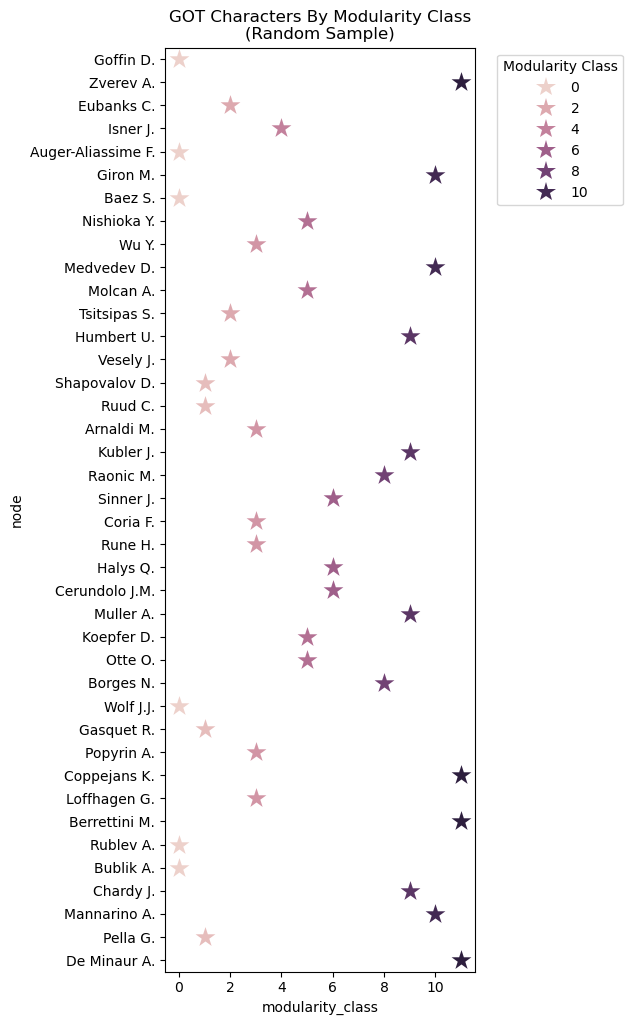

In [94]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class\n(Random Sample)")
plt.show()

Plot all Tennis players with their modularity class indicated by a star (tak

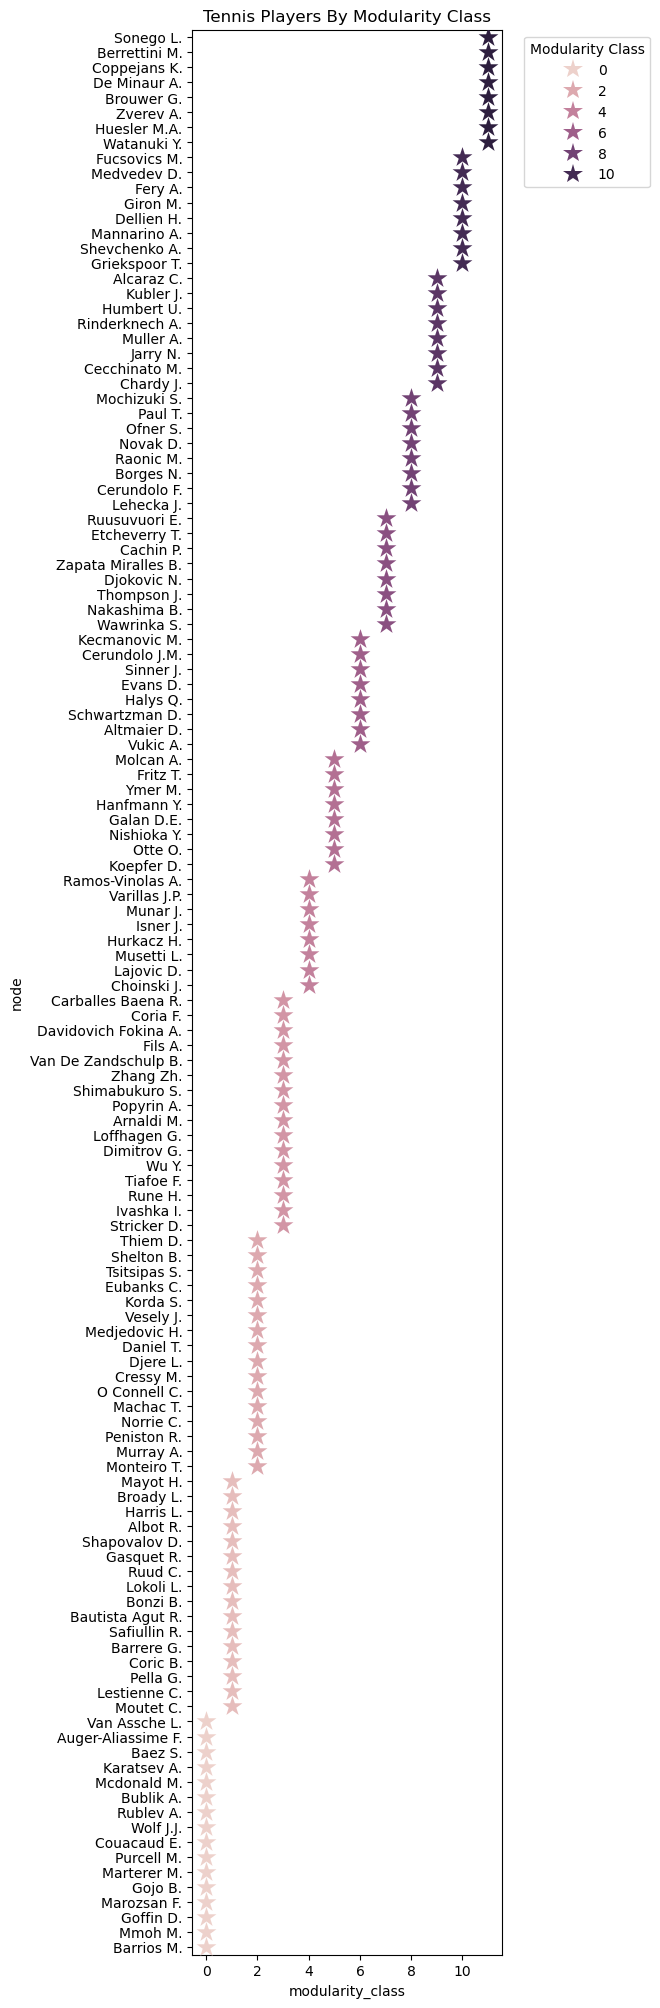

In [95]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Tennis Players By Modularity Class")
plt.show()

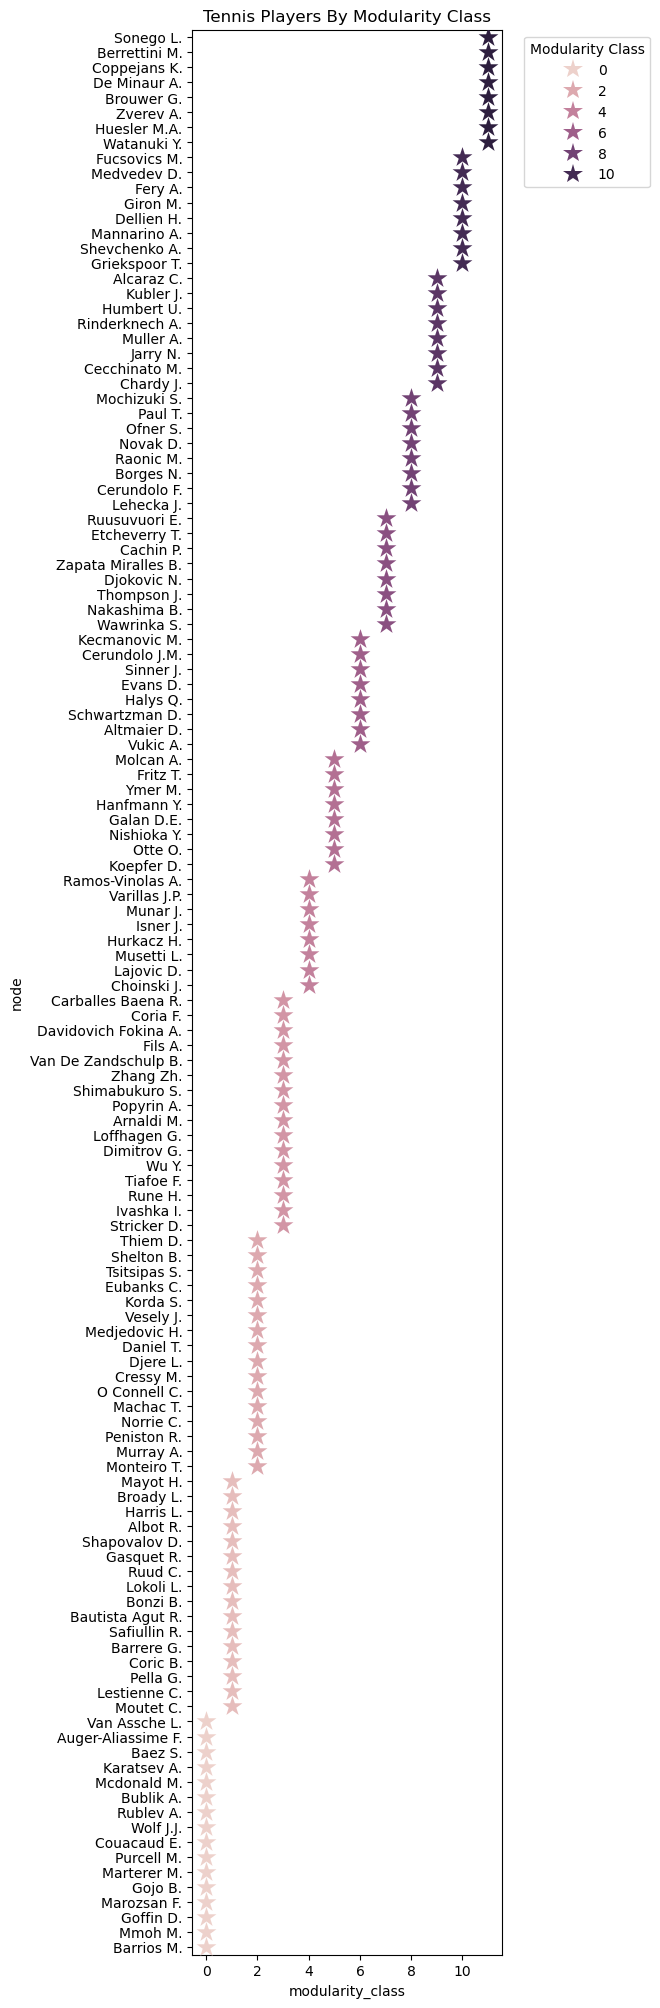

In [96]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("Tennis Players By Modularity Class")
plt.show()

## All Network Metrics

Create a Pandas dataframe of all network attributes by creating a `dict`ionary of `G.nodes(data=True)`...

In [38]:
dict(G.nodes(data=True))

{'Barrios M.': {'degree': 2},
 'Baez S.': {'degree': 1},
 'Musetti L.': {'degree': 3},
 'Varillas J.P.': {'degree': 1},
 'Karatsev A.': {'degree': 2},
 'Van Assche L.': {'degree': 1},
 'Thompson J.': {'degree': 2},
 'Nakashima B.': {'degree': 1},
 'Rublev A.': {'degree': 5},
 'Purcell M.': {'degree': 1},
 'Marterer M.': {'degree': 3},
 'Gojo B.': {'degree': 1},
 'Hurkacz H.': {'degree': 4},
 'Ramos-Vinolas A.': {'degree': 1},
 'Djokovic N.': {'degree': 7},
 'Cachin P.': {'degree': 1},
 'Mmoh M.': {'degree': 2},
 'Auger-Aliassime F.': {'degree': 1},
 'Moutet C.': {'degree': 2},
 'Gasquet R.': {'degree': 1},
 'Goffin D.': {'degree': 3},
 'Marozsan F.': {'degree': 1},
 'Broady L.': {'degree': 3},
 'Lestienne C.': {'degree': 1},
 'Wolf J.J.': {'degree': 2},
 'Couacaud E.': {'degree': 1},
 'Munar J.': {'degree': 2},
 'Isner J.': {'degree': 1},
 'Ruud C.': {'degree': 2},
 'Lokoli L.': {'degree': 1},
 'Choinski J.': {'degree': 2},
 'Lajovic D.': {'degree': 1},
 'Ymer M.': {'degree': 3},
 'Mol

...and then [transposing it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html) (flipping the columns and rows) with `.T`

In [39]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

,degree
Barrios M.,2
Baez S.,1
Musetti L.,3
Varillas J.P.,1
Karatsev A.,2
...,...
Humbert U.,1
Jarry N.,3
Cecchinato M.,1
Berrettini M.,4


In [40]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

,degree
Barrios M.,2
Baez S.,1
Musetti L.,3
Varillas J.P.,1
Karatsev A.,2
...,...
Humbert U.,1
Jarry N.,3
Cecchinato M.,1
Berrettini M.,4
